1. Операції з масивами даних у NumPy та Pandas

In [12]:
import numpy as np


array = np.array([1, 2, 3, 4, 5])

print(array.mean())

3.0


In [13]:
import pandas as pd


df = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Age': [24, 27]
})

print(df)

    Name  Age
0  Alice   24
1    Bob   27


2. Візуалізація даних за допомогою Matplotlib

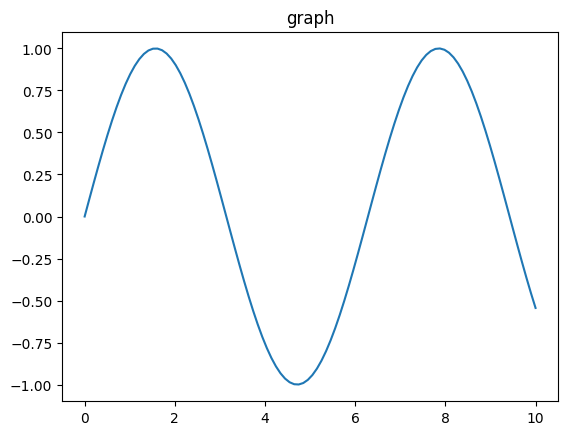

In [14]:
import matplotlib.pyplot as plt


x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title('графік синуса')
plt.show()

3. Створення та навчання простої нейронної мережі

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


# Data load
transform = transforms.Compose([transforms.ToTensor()])
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

# Model definition
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Model learning
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print('Навчання завершено!')

Learning done!


4. Аналіз результатів

In [16]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()

accuracy = correct / total
print(f'Точність моделі {(accuracy * 100):.2f}%')

Accuracy of the model 98.95%


5. Тест на реальних даних

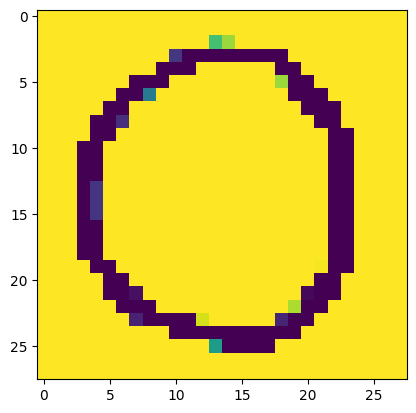

Prediction: three


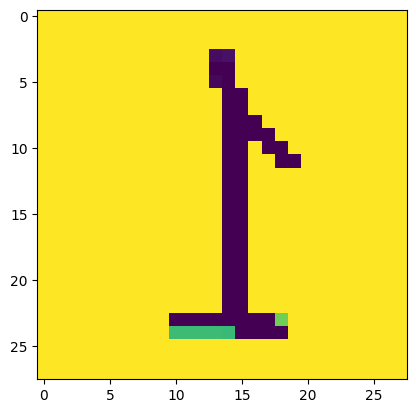

Prediction: three


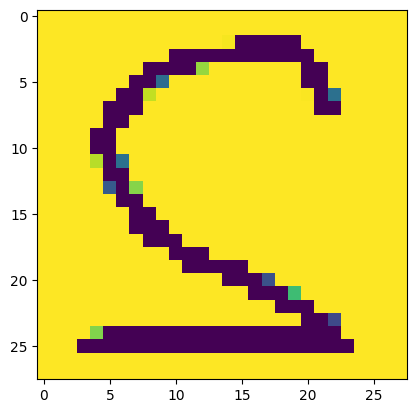

Prediction: two


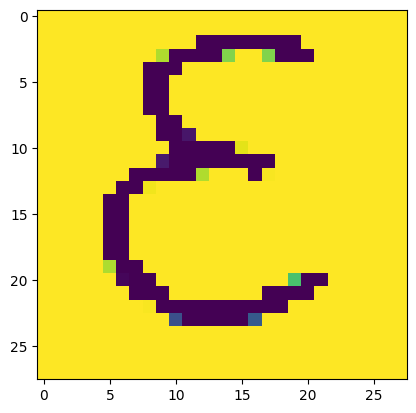

Prediction: three


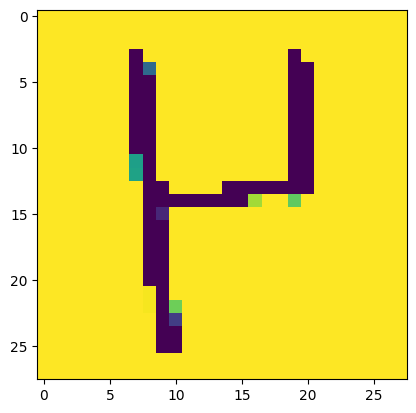

Prediction: three


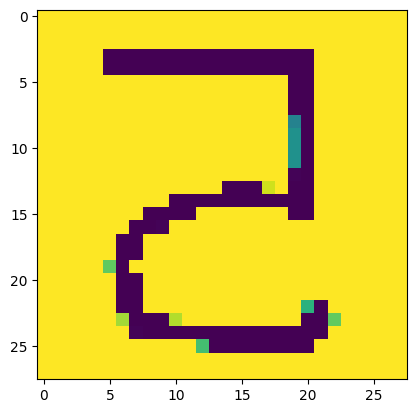

Prediction: two


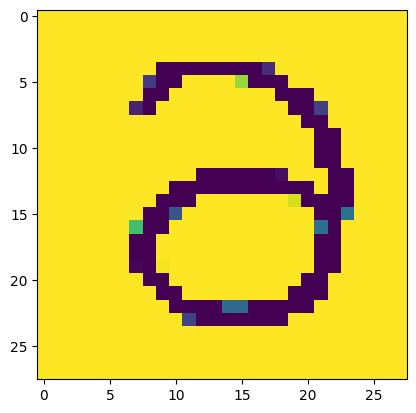

Prediction: three


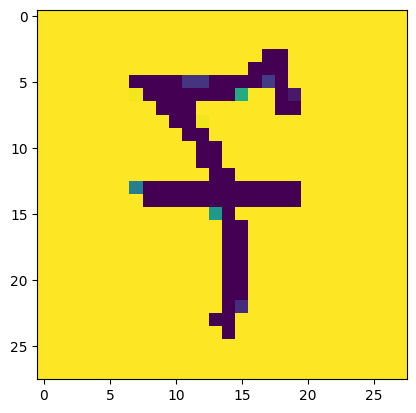

Prediction: three


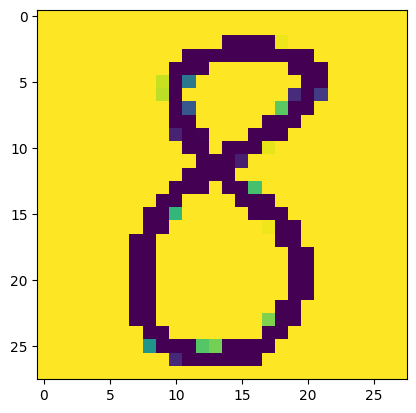

Prediction: two


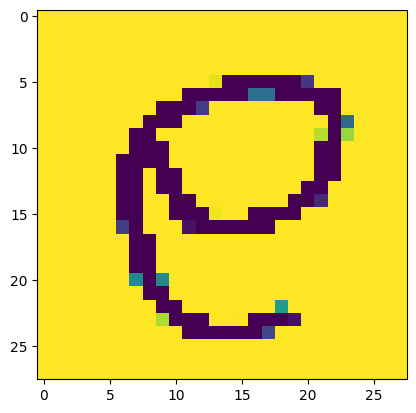

Prediction: three


In [18]:
import cv2

labels = ['нуль', 'один', 'два', 'три', 'чотри', 'п\'ять', 'шість', 'сім', 'вісім', 'дев\'ять']
directory = './testdata'
correct = 0
total = 0

for i in range(0, 10):
    img = cv2.imread(f'{directory}/{i}.png', cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.astype(np.float32) / 255.0
    img = cv2.flip(img, 1)
    
    img_tensor = torch.tensor(img).unsqueeze(0)
    img_tensor = img_tensor.view(-1, 28*28)
    
    plt.imshow(img)
    plt.show()

    outputs = model(img_tensor)
    _, prediction = torch.max(outputs.data, 1)
    
    print(f'Передбачення: {labels[prediction]}')

Контрольні питання

1. Які основні бібліотеки використовуються для роботи з генеративним ШІ?

У Python для генеративного штучного інтелекту широко застосовують бібліотеки для роботи з текстом (наприклад, Transformers, OpenAI API, LangChain), зображеннями (такі як Stable Diffusion, DALL·E, DeepDream) і музикою (Magenta, Riffusion). Основними фреймворками для побудови та тренування нейронних мереж залишаються PyTorch і TensorFlow. Також використовують спеціалізовані інструменти, як-от Diffusers для генеративних дифузійних моделей і SentenceTransformers для представлення тексту у векторному вигляді.

2. Яка роль NumPy та Pandas у підготовці даних?

NumPy забезпечує ефективну обробку числових даних, виконання операцій з багатовимірними масивами та лінійною алгеброю — це критично важливо на етапі підготовки вхідних даних. Pandas дає зручні інструменти для аналізу табличних даних: очищення, фільтрація, трансформація, агрегація, що дозволяє швидко привести дані до потрібного формату перед тренуванням моделей.

3. Як Matplotlib допомагає аналізувати результати?

Matplotlib — це інструмент для створення графіків і діаграм, який дозволяє візуалізувати результати моделювання та дослідження. З його допомогою можна помітити закономірності, відхилення, тренди у даних через побудову лінійних графіків, гістограм, точкових діаграм та інших типів візуалізацій.

4. Які кроки передбачає навчання нейронної мережі?

Процес навчання нейромережі зазвичай включає кілька етапів: (1) підготовка даних (очищення, масштабування, розбиття на тренувальну й тестову вибірки), (2) побудова архітектури моделі (визначення шарів, кількості нейронів, активаційних функцій), (3) вибір функції втрат і оптимізатора, (4) тренування моделі на даних і (5) оцінка її продуктивності на відкладеній вибірці.

5. У чому різниця між PyTorch та TensorFlow?

PyTorch використовує динамічну побудову обчислювального графа, що робить його інтуїтивно зрозумілим і гнучким для дослідницької роботи. TensorFlow, навпаки, поєднує як статичний, так і динамічний графи, що дозволяє ефективніше оптимізувати та масштабувати моделі для продакшн-розгортання.